In [11]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def tide_height(time, amplitude_1, period_1, amplitude_2, period_2):

    tide_height = amplitude_1 * np.sin(2 * np.pi * time / period_1) + \
                amplitude_2 * np.sin(2 * np.pi * time / period_2)
    
    return tide_height

In [13]:
data = pd.read_csv('data.txt', delimiter=',', header=None, names=['day', 'time', 'height'])

data['time'] = pd.to_datetime(data['time'], format='%H:%M').dt.hour + pd.to_datetime(data['time'], format='%H:%M').dt.minute/60

day = data['day'].values
time = data['time'].values
height = data['height'].values

In [14]:
popt, pcov = curve_fit(tide_height, time, height, sigma=0.25)

ValueError: array must not contain infs or NaNs

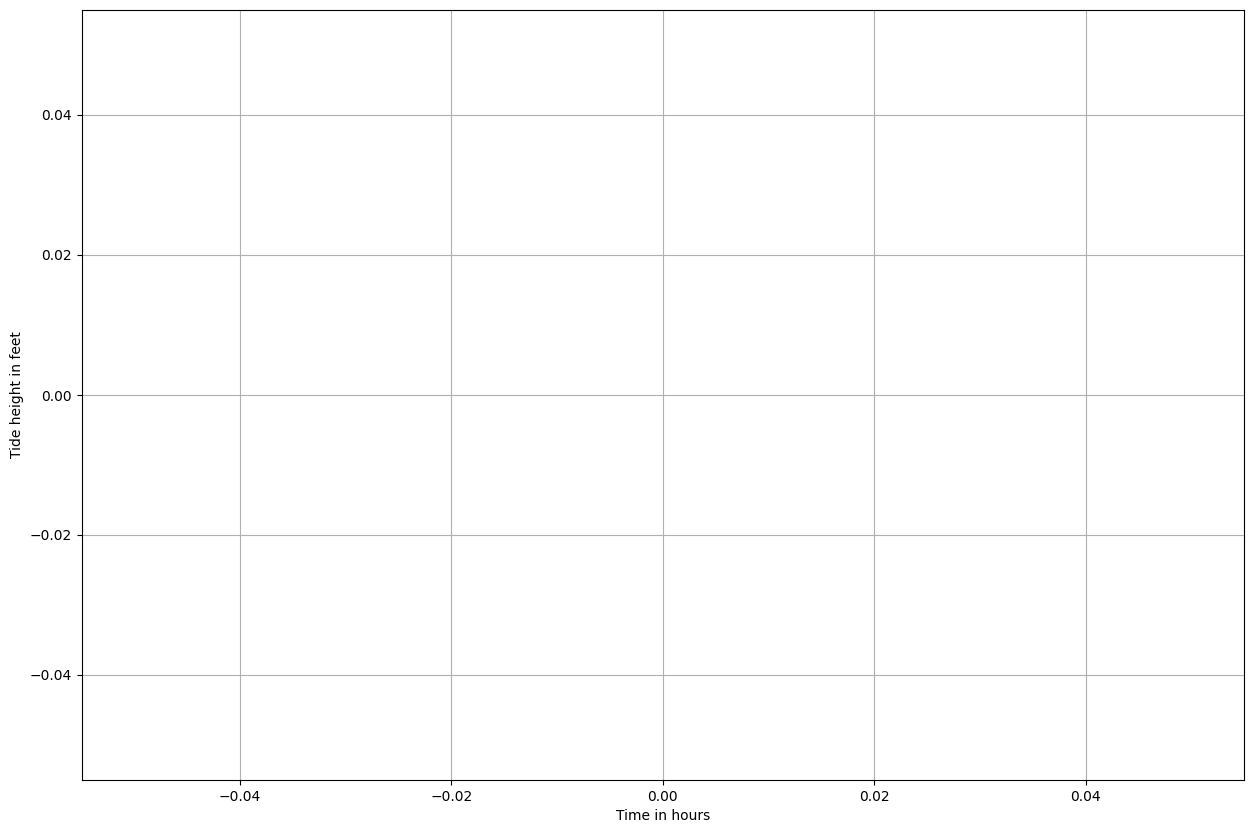

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(time, height)
plt.xlabel('Time in hours')
plt.ylabel('Tide height in feet')
plt.grid(True)
plt.savefig('figure1.pdf')
plt.show()